Movies Reviews Project - Deep Learning with Python (Francocis Chollet)

In [5]:
from keras.datasets import imdb
from keras import models
from keras import layers
import numpy as np

In [2]:
# Load the dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


In [6]:
# Preprocess the data
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [7]:
# Define the neural network architecture
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model with a binary crossentropy loss function and rmsprop optimizer
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [8]:
# Train the model
history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_test, y_test))

# Evaluate the model on the test data
results = model.evaluate(x_test, y_test)
print(results)

Epoch 1/20
49/49 [==============================] - 4s 74ms/step - loss: 0.4423 - accuracy: 0.8136 - val_loss: 0.3387 - val_accuracy: 0.8711
Epoch 2/20
49/49 [==============================] - 2s 40ms/step - loss: 0.2567 - accuracy: 0.9084 - val_loss: 0.3105 - val_accuracy: 0.8716
Epoch 3/20
49/49 [==============================] - 2s 40ms/step - loss: 0.2041 - accuracy: 0.9265 - val_loss: 0.3101 - val_accuracy: 0.8746
Epoch 4/20
49/49 [==============================] - 3s 61ms/step - loss: 0.1753 - accuracy: 0.9369 - val_loss: 0.2933 - val_accuracy: 0.8834
Epoch 5/20
49/49 [==============================] - 2s 43ms/step - loss: 0.1505 - accuracy: 0.9465 - val_loss: 0.3695 - val_accuracy: 0.8608
Epoch 6/20
49/49 [==============================] - 2s 40ms/step - loss: 0.1342 - accuracy: 0.9514 - val_loss: 0.3284 - val_accuracy: 0.8778
Epoch 7/20
49/49 [==============================] - 3s 63ms/step - loss: 0.1180 - accuracy: 0.9592 - val_loss: 0.3468 - val_accuracy: 0.8748
Epoch 8/20
49

Bouston House Price Prediction - Deep learning with Python( Francocis Chollet)

In [10]:
from keras.datasets import boston_housing
from keras import models
from keras import layers
import numpy as np

In [11]:
# Load the data
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [12]:
# Normalize the data by subtracting the mean and dividing by the standard deviation
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data -= mean
train_data /= std
test_data -= mean
test_data /= std

In [13]:
# Define the neural network architecture
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [14]:
# Compiling the model
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [16]:

# Evaluating the model on the test data
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

print('Test MAE:', test_mae_score)


Epoch 1/100
21/21 [==============================] - 1s 12ms/step - loss: 518.7319 - mae: 20.8569 - val_loss: 523.3784 - val_mae: 21.0052
Epoch 2/100
21/21 [==============================] - 0s 5ms/step - loss: 400.9323 - mae: 17.9080 - val_loss: 385.1029 - val_mae: 17.6404
Epoch 3/100
21/21 [==============================] - 0s 7ms/step - loss: 269.3322 - mae: 14.1616 - val_loss: 238.8140 - val_mae: 13.2826
Epoch 4/100
21/21 [==============================] - 0s 6ms/step - loss: 149.3169 - mae: 9.9496 - val_loss: 121.5316 - val_mae: 8.6060
Epoch 5/100
21/21 [==============================] - 0s 5ms/step - loss: 77.8495 - mae: 6.7408 - val_loss: 73.2077 - val_mae: 6.3811
Epoch 6/100
21/21 [==============================] - 0s 5ms/step - loss: 51.2423 - mae: 5.2830 - val_loss: 48.7024 - val_mae: 5.1039
Epoch 7/100
21/21 [==============================] - 0s 5ms/step - loss: 38.6323 - mae: 4.4578 - val_loss: 36.1571 - val_mae: 4.4730
Epoch 8/100
21/21 [==============================] - 0

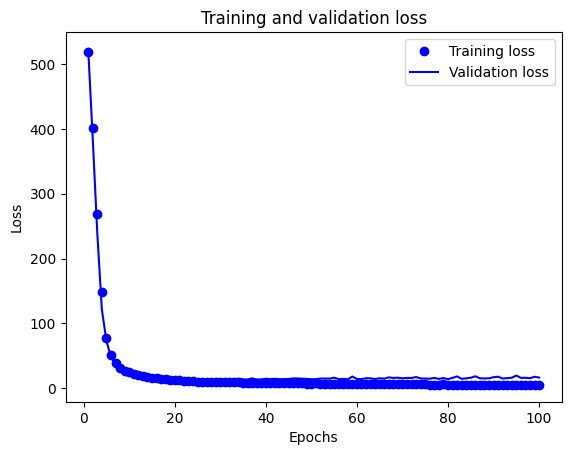

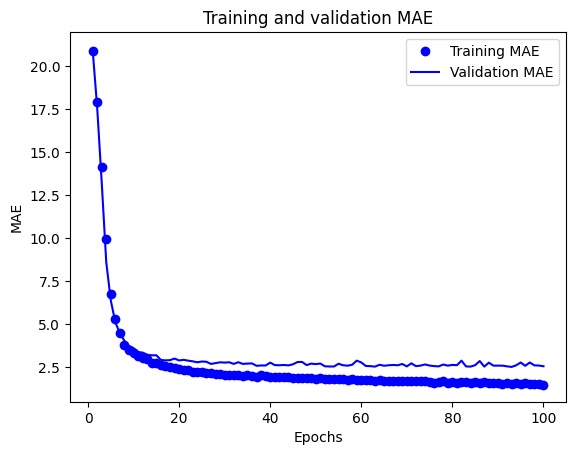

In [17]:
import matplotlib.pyplot as plt

# Plotting the training and validation loss
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting the training and validation MAE
mae = history.history['mae']
val_mae = history.history['val_mae']
plt.plot(epochs, mae, 'bo', label='Training MAE')
plt.plot(epochs, val_mae, 'b', label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()
